In [ ]:
from mapping import (
    compute_area_scores
)

from alex_extractor import build_alexnet_design_matrices_with_dataloader

from plotter import plot_comparison

import pandas as pd

IMAGE_FOLDER = "../Preproc2/images/"
NUM_WORKERS = 15
METRIC = "PLS"

# Test parameters (fast)
N_BOOT = 1
N_SPLITS = 1

# Mouse-vision style parameters (for final results)
# N_BOOT = 100  # n_iter in mouse-vision
# N_SPLITS = 10  # num_splits in mouse-vision

PLS_N_COMPONENTS = 25

# Passing the stimuli to AlexNet and extracting activations

The idea is to use a pretrained model (AlexNet) to extract features from the stimuli images, and then use these features to predict neural responses. 

Using the formalism discussed in the [neural_to_neural.ipynb](neural_to_neural.ipynb) notebook, we can think of the model as a "source" and the neural data as a "target". We will compute the similarity between the model's representation and the neural representation using the same metrics as before (RSA, CKA, PLS).

Here the design matrices of the AlexNet representation do not have trials, to the splits (required for the reliability computation in the corrected similarity version) are performed only on the neural data.

In [2]:
index_model_random = build_alexnet_design_matrices_with_dataloader(
    folder=IMAGE_FOLDER,
    batch_size=16,
    shuffle=False,
    num_workers=NUM_WORKERS,
    weights="random",
    device="cuda",
    amp=True,
    layers_keep=["conv1", "conv2", "conv3", "conv4", "conv5"],
    save_dir="alex-random-matrices",
    return_in_memory=False
)

In [3]:
index_model_inet_no_diet = build_alexnet_design_matrices_with_dataloader(
    folder=IMAGE_FOLDER,
    batch_size=16,
    shuffle=False,
    num_workers=NUM_WORKERS,
    weights="checkpoints/supervised_no-diet/20250915_023037_sgd/checkpoint_epoch_50.pth",
    device="cuda",
    amp=True,
    layers_keep=["conv1", "conv2", "conv3", "conv4", "conv5"],
    save_dir="alex-matrices-supervised-no-diet",
    return_in_memory=False
)

In [4]:
# index_model_inet_diet = build_alexnet_design_matrices_with_dataloader(
#     folder=IMAGE_FOLDER,
#     batch_size=16,
#     shuffle=False,
#     num_workers=NUM_WORKERS,
#     weights="checkpoints/supervised_diet/20250930_022201_no-aug/checkpoint_epoch_50.pth",
#     device="cuda",
#     amp=True,
#     layers_keep=["conv1", "conv2", "conv3", "conv4", "conv5"],
#     save_dir="alex-matrices-supervised-diet",
#     return_in_memory=False
# )

Loading the index file with paths to neural data

In [5]:
index_df = pd.read_csv('../Preproc2/data/combined_index.csv')

In [6]:
# random
layer_scores_random, median_scores_random = compute_area_scores(
    index_model_random,
    index_df,
    sim_metric=METRIC,
    verbose=True,
    n_boot=N_BOOT,
    n_splits=N_SPLITS,
    chunk_size=50000,
    n_components=PLS_N_COMPONENTS,
    model_name='random'
)

Layer: conv1, Area: VISal, Specimen: 735109609, Score: 0.3063


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv1, Area: VISal, Specimen: 738651054, Score: 0.3047
Layer: conv1, Area: VISal, Specimen: 739783171, Score: 0.2921


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv1, Area: VISal, Specimen: 742714475, Score: 0.2680


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv1, Area: VISal, Specimen: 757329624, Score: 0.3167
Layer: conv1, Area: VISal, Specimen: 775876828, Score: 0.1931


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv1, Area: VISam, Specimen: 730756780, Score: 0.3640
Layer: conv1, Area: VISam, Specimen: 734865738, Score: 0.2856
Layer: conv1, Area: VISam, Specimen: 738651054, Score: 0.2297
Layer: conv1, Area: VISam, Specimen: 739783171, Score: 0.2492
Layer: conv1, Area: VISam, Specimen: 742602892, Score: 0.3090


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv1, Area: VISam, Specimen: 744915204, Score: 0.1692
Layer: conv1, Area: VISam, Specimen: 775876828, Score: 0.1074
Layer: conv1, Area: VISl, Specimen: 716813543, Score: 0.2232
Layer: conv1, Area: VISl, Specimen: 723627604, Score: 0.1591


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv1, Area: VISl, Specimen: 739783171, Score: 0.2716


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv1, Area: VISl, Specimen: 745276236, Score: 0.4397
Layer: conv1, Area: VISl, Specimen: 772616823, Score: 0.1785
Layer: conv1, Area: VISl, Specimen: 775876828, Score: 0.2190


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv1, Area: VISp, Specimen: 717038288, Score: 0.2124
Layer: conv1, Area: VISp, Specimen: 719828690, Score: 0.1971
Layer: conv1, Area: VISp, Specimen: 730756780, Score: 0.1482
Layer: conv1, Area: VISp, Specimen: 738651054, Score: 0.1900
Layer: conv1, Area: VISp, Specimen: 739783171, Score: 0.2112
Layer: conv1, Area: VISp, Specimen: 742602892, Score: 0.2311
Layer: conv1, Area: VISp, Specimen: 744915204, Score: 0.2373
Layer: conv1, Area: VISp, Specimen: 772616823, Score: 0.1871
Layer: conv1, Area: VISpm, Specimen: 726170935, Score: 0.2823
Layer: conv1, Area: VISpm, Specimen: 734865738, Score: 0.2990
Layer: conv1, Area: VISpm, Specimen: 738651054, Score: 0.2385
Layer: conv1, Area: VISpm, Specimen: 739783171, Score: 0.3026
Layer: conv1, Area: VISpm, Specimen: 742714475, Score: 0.3331
Layer: conv1, Area: VISrl, Specimen: 716813543, Score: 0.3723
Layer: conv1, Area: VISrl, Specimen: 723627604, Score: 0.3181
Layer: conv1, Area: VISrl, Specimen: 732548380, Score: 0.2619
Layer: conv1, Ar

/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv1, Area: VISrl, Specimen: 744915204, Score: 0.1536
Layer: conv2, Area: VISal, Specimen: 735109609, Score: 0.3644
Layer: conv2, Area: VISal, Specimen: 738651054, Score: 0.2982
Layer: conv2, Area: VISal, Specimen: 739783171, Score: 0.3680


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv2, Area: VISal, Specimen: 742714475, Score: 0.3296


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv2, Area: VISal, Specimen: 757329624, Score: 0.3566
Layer: conv2, Area: VISal, Specimen: 775876828, Score: 0.2010


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv2, Area: VISam, Specimen: 730756780, Score: 0.3873


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv2, Area: VISam, Specimen: 734865738, Score: 0.3171


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv2, Area: VISam, Specimen: 738651054, Score: 0.2954


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv2, Area: VISam, Specimen: 739783171, Score: 0.3255
Layer: conv2, Area: VISam, Specimen: 742602892, Score: 0.3710
Layer: conv2, Area: VISam, Specimen: 744915204, Score: 0.2085
Layer: conv2, Area: VISam, Specimen: 775876828, Score: 0.1961


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv2, Area: VISl, Specimen: 716813543, Score: 0.2914
Layer: conv2, Area: VISl, Specimen: 723627604, Score: 0.1729
Layer: conv2, Area: VISl, Specimen: 739783171, Score: 0.2898
Layer: conv2, Area: VISl, Specimen: 745276236, Score: 0.4411
Layer: conv2, Area: VISl, Specimen: 772616823, Score: 0.2350


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv2, Area: VISl, Specimen: 775876828, Score: 0.2509
Layer: conv2, Area: VISp, Specimen: 717038288, Score: 0.2431


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv2, Area: VISp, Specimen: 719828690, Score: 0.2550
Layer: conv2, Area: VISp, Specimen: 730756780, Score: 0.2788
Layer: conv2, Area: VISp, Specimen: 738651054, Score: 0.2385
Layer: conv2, Area: VISp, Specimen: 739783171, Score: 0.3082
Layer: conv2, Area: VISp, Specimen: 742602892, Score: 0.3711
Layer: conv2, Area: VISp, Specimen: 744915204, Score: 0.2521


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv2, Area: VISp, Specimen: 772616823, Score: 0.2372


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv2, Area: VISpm, Specimen: 726170935, Score: 0.3190
Layer: conv2, Area: VISpm, Specimen: 734865738, Score: 0.3468
Layer: conv2, Area: VISpm, Specimen: 738651054, Score: 0.3347
Layer: conv2, Area: VISpm, Specimen: 739783171, Score: 0.3045
Layer: conv2, Area: VISpm, Specimen: 742714475, Score: 0.3364
Layer: conv2, Area: VISrl, Specimen: 716813543, Score: 0.3813


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv2, Area: VISrl, Specimen: 723627604, Score: 0.3659


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv2, Area: VISrl, Specimen: 732548380, Score: 0.2661


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv2, Area: VISrl, Specimen: 738651054, Score: 0.5237
Layer: conv2, Area: VISrl, Specimen: 742602892, Score: 0.5010


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv2, Area: VISrl, Specimen: 742714475, Score: 0.4362
Layer: conv2, Area: VISrl, Specimen: 744915204, Score: 0.1792
Layer: conv3, Area: VISal, Specimen: 735109609, Score: 0.3845


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv3, Area: VISal, Specimen: 738651054, Score: 0.3012
Layer: conv3, Area: VISal, Specimen: 739783171, Score: 0.3756
Layer: conv3, Area: VISal, Specimen: 742714475, Score: 0.3385


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv3, Area: VISal, Specimen: 757329624, Score: 0.3576
Layer: conv3, Area: VISal, Specimen: 775876828, Score: 0.2445


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv3, Area: VISam, Specimen: 730756780, Score: 0.4230


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv3, Area: VISam, Specimen: 734865738, Score: 0.3428
Layer: conv3, Area: VISam, Specimen: 738651054, Score: 0.3060
Layer: conv3, Area: VISam, Specimen: 739783171, Score: 0.3500
Layer: conv3, Area: VISam, Specimen: 742602892, Score: 0.3836
Layer: conv3, Area: VISam, Specimen: 744915204, Score: 0.2326
Layer: conv3, Area: VISam, Specimen: 775876828, Score: 0.2483
Layer: conv3, Area: VISl, Specimen: 716813543, Score: 0.3050
Layer: conv3, Area: VISl, Specimen: 723627604, Score: 0.1975
Layer: conv3, Area: VISl, Specimen: 739783171, Score: 0.2647
Layer: conv3, Area: VISl, Specimen: 745276236, Score: 0.4201
Layer: conv3, Area: VISl, Specimen: 772616823, Score: 0.2469
Layer: conv3, Area: VISl, Specimen: 775876828, Score: 0.2994


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv3, Area: VISp, Specimen: 717038288, Score: 0.2829
Layer: conv3, Area: VISp, Specimen: 719828690, Score: 0.3020
Layer: conv3, Area: VISp, Specimen: 730756780, Score: 0.3153
Layer: conv3, Area: VISp, Specimen: 738651054, Score: 0.2700


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv3, Area: VISp, Specimen: 739783171, Score: 0.3745
Layer: conv3, Area: VISp, Specimen: 742602892, Score: 0.3859
Layer: conv3, Area: VISp, Specimen: 744915204, Score: 0.2896
Layer: conv3, Area: VISp, Specimen: 772616823, Score: 0.3156
Layer: conv3, Area: VISpm, Specimen: 726170935, Score: 0.3237
Layer: conv3, Area: VISpm, Specimen: 734865738, Score: 0.3510
Layer: conv3, Area: VISpm, Specimen: 738651054, Score: 0.3542
Layer: conv3, Area: VISpm, Specimen: 739783171, Score: 0.3342
Layer: conv3, Area: VISpm, Specimen: 742714475, Score: 0.3438
Layer: conv3, Area: VISrl, Specimen: 716813543, Score: 0.3854
Layer: conv3, Area: VISrl, Specimen: 723627604, Score: 0.3626


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv3, Area: VISrl, Specimen: 732548380, Score: 0.2855
Layer: conv3, Area: VISrl, Specimen: 738651054, Score: 0.4790


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv3, Area: VISrl, Specimen: 742602892, Score: 0.4989
Layer: conv3, Area: VISrl, Specimen: 742714475, Score: 0.4291
Layer: conv3, Area: VISrl, Specimen: 744915204, Score: 0.1802
Layer: conv4, Area: VISal, Specimen: 735109609, Score: 0.3841


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv4, Area: VISal, Specimen: 738651054, Score: 0.2971
Layer: conv4, Area: VISal, Specimen: 739783171, Score: 0.3683


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv4, Area: VISal, Specimen: 742714475, Score: 0.3353


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv4, Area: VISal, Specimen: 757329624, Score: 0.3559
Layer: conv4, Area: VISal, Specimen: 775876828, Score: 0.2408
Layer: conv4, Area: VISam, Specimen: 730756780, Score: 0.4253
Layer: conv4, Area: VISam, Specimen: 734865738, Score: 0.3606


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv4, Area: VISam, Specimen: 738651054, Score: 0.2993


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv4, Area: VISam, Specimen: 739783171, Score: 0.3528


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv4, Area: VISam, Specimen: 742602892, Score: 0.3823
Layer: conv4, Area: VISam, Specimen: 744915204, Score: 0.2350
Layer: conv4, Area: VISam, Specimen: 775876828, Score: 0.2607
Layer: conv4, Area: VISl, Specimen: 716813543, Score: 0.3047
Layer: conv4, Area: VISl, Specimen: 723627604, Score: 0.1852


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv4, Area: VISl, Specimen: 739783171, Score: 0.2577
Layer: conv4, Area: VISl, Specimen: 745276236, Score: 0.4164
Layer: conv4, Area: VISl, Specimen: 772616823, Score: 0.2311
Layer: conv4, Area: VISl, Specimen: 775876828, Score: 0.3167
Layer: conv4, Area: VISp, Specimen: 717038288, Score: 0.2771
Layer: conv4, Area: VISp, Specimen: 719828690, Score: 0.3086


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv4, Area: VISp, Specimen: 730756780, Score: 0.3310
Layer: conv4, Area: VISp, Specimen: 738651054, Score: 0.2622
Layer: conv4, Area: VISp, Specimen: 739783171, Score: 0.3633
Layer: conv4, Area: VISp, Specimen: 742602892, Score: 0.3807


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv4, Area: VISp, Specimen: 744915204, Score: 0.2800
Layer: conv4, Area: VISp, Specimen: 772616823, Score: 0.3220
Layer: conv4, Area: VISpm, Specimen: 726170935, Score: 0.3207
Layer: conv4, Area: VISpm, Specimen: 734865738, Score: 0.3469
Layer: conv4, Area: VISpm, Specimen: 738651054, Score: 0.3532


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv4, Area: VISpm, Specimen: 739783171, Score: 0.3417
Layer: conv4, Area: VISpm, Specimen: 742714475, Score: 0.3412
Layer: conv4, Area: VISrl, Specimen: 716813543, Score: 0.3791
Layer: conv4, Area: VISrl, Specimen: 723627604, Score: 0.3524
Layer: conv4, Area: VISrl, Specimen: 732548380, Score: 0.2762
Layer: conv4, Area: VISrl, Specimen: 738651054, Score: 0.4723
Layer: conv4, Area: VISrl, Specimen: 742602892, Score: 0.4868
Layer: conv4, Area: VISrl, Specimen: 742714475, Score: 0.4241


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv4, Area: VISrl, Specimen: 744915204, Score: 0.1768
Layer: conv5, Area: VISal, Specimen: 735109609, Score: 0.3783
Layer: conv5, Area: VISal, Specimen: 738651054, Score: 0.2916
Layer: conv5, Area: VISal, Specimen: 739783171, Score: 0.3757
Layer: conv5, Area: VISal, Specimen: 742714475, Score: 0.3357
Layer: conv5, Area: VISal, Specimen: 757329624, Score: 0.3536
Layer: conv5, Area: VISal, Specimen: 775876828, Score: 0.2545
Layer: conv5, Area: VISam, Specimen: 730756780, Score: 0.4075
Layer: conv5, Area: VISam, Specimen: 734865738, Score: 0.3534
Layer: conv5, Area: VISam, Specimen: 738651054, Score: 0.3143
Layer: conv5, Area: VISam, Specimen: 739783171, Score: 0.3630
Layer: conv5, Area: VISam, Specimen: 742602892, Score: 0.3731
Layer: conv5, Area: VISam, Specimen: 744915204, Score: 0.2385
Layer: conv5, Area: VISam, Specimen: 775876828, Score: 0.2535
Layer: conv5, Area: VISl, Specimen: 716813543, Score: 0.3071
Layer: conv5, Area: VISl, Specimen: 723627604, Score: 0.1827
Layer: con

/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv5, Area: VISp, Specimen: 772616823, Score: 0.3174
Layer: conv5, Area: VISpm, Specimen: 726170935, Score: 0.3298
Layer: conv5, Area: VISpm, Specimen: 734865738, Score: 0.3280
Layer: conv5, Area: VISpm, Specimen: 738651054, Score: 0.3506


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)
/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv5, Area: VISpm, Specimen: 739783171, Score: 0.3413


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv5, Area: VISpm, Specimen: 742714475, Score: 0.3370
Layer: conv5, Area: VISrl, Specimen: 716813543, Score: 0.3726
Layer: conv5, Area: VISrl, Specimen: 723627604, Score: 0.3570
Layer: conv5, Area: VISrl, Specimen: 732548380, Score: 0.2845
Layer: conv5, Area: VISrl, Specimen: 738651054, Score: 0.4598


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv5, Area: VISrl, Specimen: 742602892, Score: 0.4890


/home/spina/Desktop/units/DL/project/mice-representation/.mouse_vision/lib/python3.13/site-packages/sklearn/cross_decomposition/_pls.py:104: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn("Maximum number of iterations reached", ConvergenceWarning)


Layer: conv5, Area: VISrl, Specimen: 742714475, Score: 0.4257
Layer: conv5, Area: VISrl, Specimen: 744915204, Score: 0.1674


In [7]:
# # inet no diet
# layer_scores_inet_no_diet, median_scores_inet_no_diet = compute_area_scores(
#     index_model_inet_no_diet,
#     index_df, 
#     sim_metric=METRIC,
#     verbose=True,
#     n_boot=N_BOOT,
#     n_splits=N_SPLITS,
#     chunk_size=50000,
#     n_components=PLS_N_COMPONENTS,
#     model_name='supervised_no-diet'
# )

In [8]:
# # inet diet
# layer_scores_inet_diet, median_scores_inet_diet = compute_area_scores(
#     index_model_inet_diet,
#     index_df, 
#     sim_metric=METRIC,
#     verbose=True,
#     n_boot=N_BOOT,
#     n_splits=N_SPLITS,
#     chunk_size=50000,
#     n_components=PLS_N_COMPONENTS,
#     model_name='supervised_diet'
# )

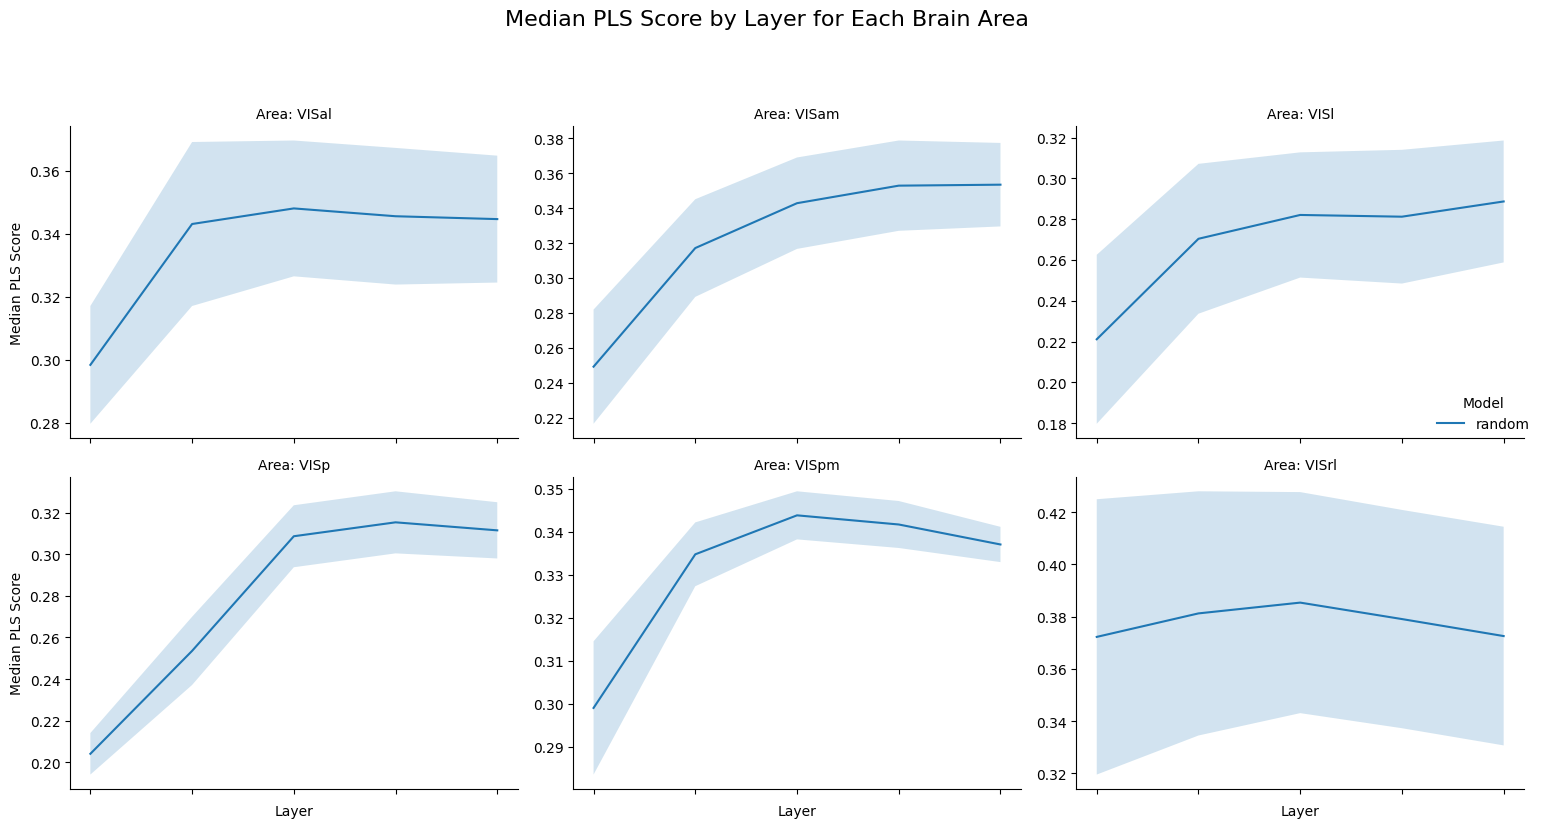

In [10]:
from plotter import plot_comparison_multi

plot_comparison_multi([median_scores_random], ["random"], metric_name=METRIC)